In [45]:
# Article used here: https://machinelearningmastery.com/handle-missing-data-python/
import pandas as pd
import numpy as np
import matplotlib
import toolbox
import aloy
from matplotlib import pyplot as plt

plt.style.use('ggplot')

df = pd.read_csv('cars.csv')
df.columns = ['symboling',
              'normalized-losses',
              'make',
              'fuel-type',
              'aspiration',
              'num-of-doors',
              'body-style',
              'drive-wheels',
              'engine-location',
              'wheel-base',
              'length',
              'width',
              'height',
              'curb-weight',
              'engine-type',
              'num-of-cylinders',
              'engine-size',
              'fuel-system',
              'bore',
              'stroke',
              'compression-ratio',
              'horsepower',
              'peak-rpm',
              'city-mpg',
              'highway-mpg',
              'price']
pd.set_option('display.max_columns', len(df.columns))
df.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [46]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,0.823529,98.806373,174.075000,65.916667,53.749020,2555.602941,126.892157,10.148137,25.240196,30.769608
std,1.239035,5.994144,12.362123,2.146716,2.424901,521.960820,41.744569,3.981000,6.551513,6.898337
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.075000,52.000000,2145.000000,97.000000,8.575000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.200000,66.900000,55.500000,2939.250000,142.000000,9.400000,30.000000,34.500000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


We can see that there are columns that have a minimum value of zero (0). On some columns, a value of zero does not make sense and indicates an invalid or missing value.

In [47]:
# map the categorical
cats = ['make', 'fuel-type', 'aspiration', 'body-style', 'engine-location', 'engine-type', 'fuel-system', 'drive-wheels', 'num-of-cylinders']
df = toolbox.to_category(df, cats)

In [48]:
# convert num of doors to numeric
# ensure is not missing
print(df['num-of-doors'].unique()) # it is missing
def convert_doors(x):
    if x == 'four':
        return 4
    elif x == 'two':
        return 2
    else:
        return np.nan
df['num-of-doors'] = df['num-of-doors'].map(convert_doors)

['two' 'four' '?']


In [49]:
# remove ? from numeric columns
no_cat = df.drop(cats, axis=1)
for c in no_cat.columns:
    df[c] = df[c].map(lambda x: np.nan if x == '?' else x)


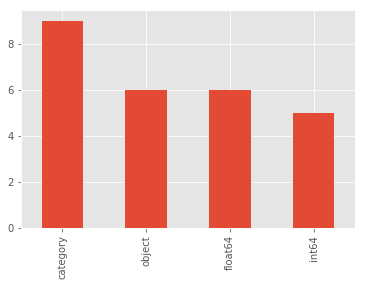

In [50]:
df.dtypes.value_counts().plot.bar()
plt.show()

In [51]:
# im curious to see what is in the object type columns, most of them is because they have missing data
toolbox.show_object_columns(df=df).head(5)

,normalized-losses,bore,stroke,horsepower,peak-rpm,price
0,NaN,3.47,2.68,111,5000,16500
1,NaN,2.68,3.47,154,5000,16500
2,164,3.19,3.40,102,5500,13950
3,164,3.19,3.40,115,5500,17450
4,NaN,3.19,3.40,110,5500,15250


In [52]:
# convert columns above to numerical since they are all numbers and nans
toolbox.convert_type(df, 'object')

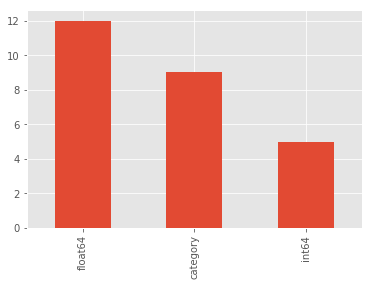

In [53]:
df.dtypes.value_counts().plot.bar()
plt.show()

In [54]:
# lets convert those int64
toolbox.convert_type(df, 'int64')

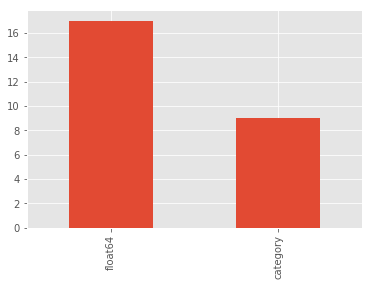

In [55]:
df.dtypes.value_counts().plot.bar()
plt.show()

In [56]:
# nice we managed to get 17 numerical types and 9 categories
# but still have missing numbers, but now they are NaNs
# lets put the mean value into the NaN values
df.fillna(df.mean(), inplace=True)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,122.0,alfa-romero,gas,std,2.000000,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.00,111.0,5000.0,21.0,27.0,16500.00
1,1.0,122.0,alfa-romero,gas,std,2.000000,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823.0,ohcv,six,152.0,mpfi,2.68,3.47,9.00,154.0,5000.0,19.0,26.0,16500.00
2,2.0,164.0,audi,gas,std,4.000000,sedan,fwd,front,99.8,176.6,66.2,54.3,2337.0,ohc,four,109.0,mpfi,3.19,3.40,10.00,102.0,5500.0,24.0,30.0,13950.00
3,2.0,164.0,audi,gas,std,4.000000,sedan,4wd,front,99.4,176.6,66.4,54.3,2824.0,ohc,five,136.0,mpfi,3.19,3.40,8.00,115.0,5500.0,18.0,22.0,17450.00
4,2.0,122.0,audi,gas,std,2.000000,sedan,fwd,front,99.8,177.3,66.3,53.1,2507.0,ohc,five,136.0,mpfi,3.19,3.40,8.50,110.0,5500.0,19.0,25.0,15250.00
5,1.0,158.0,audi,gas,std,4.000000,sedan,fwd,front,105.8,192.7,71.4,55.7,2844.0,ohc,five,136.0,mpfi,3.19,3.40,8.50,110.0,5500.0,19.0,25.0,17710.00
6,1.0,122.0,audi,gas,std,4.000000,wagon,fwd,front,105.8,192.7,71.4,55.7,2954.0,ohc,five,136.0,mpfi,3.19,3.40,8.50,110.0,5500.0,19.0,25.0,18920.00
7,1.0,158.0,audi,gas,turbo,4.000000,sedan,fwd,front,105.8,192.7,71.4,55.9,3086.0,ohc,five,131.0,mpfi,3.13,3.40,8.30,140.0,5500.0,17.0,20.0,23875.00
8,0.0,122.0,audi,gas,turbo,2.000000,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053.0,ohc,five,131.0,mpfi,3.13,3.40,7.00,160.0,5500.0,16.0,22.0,13205.69
9,2.0,192.0,bmw,gas,std,2.000000,sedan,rwd,front,101.2,176.8,64.8,54.3,2395.0,ohc,four,108.0,mpfi,3.50,2.80,8.80,101.0,5800.0,23.0,29.0,16430.00


In [57]:
# check for NaNs to ensure the previous action worked as expected.
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [58]:
# nice no missing values!
# Lets encode those categories
from sklearn.preprocessing import LabelEncoder

encoders = []
for c in df.select_dtypes(include=['category']):
    col = df[c]
    encoder = LabelEncoder().fit(df[c].values)
    name = df[c].name
    encoders.append((name, encoder))
    df[c] = encoder.transform(col.values)

In [59]:
# separate the label from possible features
X = df.drop('symboling', axis=1).as_matrix()
y = df['symboling'].map(lambda x: 0 if x <= 0 else 1).values


```python
# select best features
from sklearn.feature_selection import SelectKBest, chi2

X_best = SelectKBest(chi2, k=10).fit_transform(X, y)
```

```python
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel

clf = DecisionTreeClassifier()
clf.fit(X,y)
selfrommodel = SelectFromModel(clf, prefit=True)
X_tree = selfrommodel.transform(X)
```

In [60]:
import lightgbm as lgbm
from sklearn.model_selection import cross_val_score, train_test_split, validation_curve

In [61]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
X_scl = scaler.fit_transform(X)

In [78]:
X_train,  X_test, y_train, y_test = train_test_split(X_scl, y, random_state=123)

clf = lgbm.LGBMClassifier(n_estimators=1500, learning_rate=0.01, max_depth=4, feature_fraction=0.4)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))
print(cross_val_score(clf, X_scl, y).mean())

0.921568627451
0.779593083177


In [81]:
param_range = [20, 30, 50, 100, 200, 300]
train_scores, test_scores = validation_curve(lgbm.LGBMClassifier(n_estimators=1500, learning_rate=0.01, max_depth=4), X_scl , y, 
                                             param_name='num_leaves', param_range=param_range, cv=10)


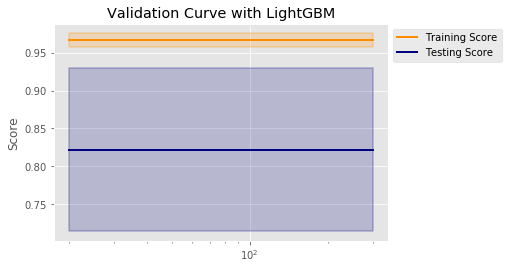

In [82]:
plt.title("Validation Curve with LightGBM")
plt.xlabel("")
plt.ylabel("Score")
plt.xticks(param_range)
aloy.build_validation_curve_plot(train_scores, test_scores, param_range)
plt.legend(bbox_to_anchor=(1,1) ,loc="best")
plt.show()

let the fraction be the default 1, with 1500 estimators and a learnign rate of 0.01, lets compute the accuracy and save the model

In [85]:
model = lgbm.LGBMClassifier(n_estimators=1500, learning_rate=0.01, max_depth=4, num_leaves=200)
model.fit(X_train, y_train)
preds = model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix
print(confusion_matrix(y_test, preds))
print('-'*40)
print(accuracy_score(y_test, preds))

[[20  1]
 [ 3 27]]
----------------------------------------
0.921568627451


In [88]:
import pickle
with open('lgbm.pkl', 'wb') as f:
    pickle.dump(model, f)